# Exploratory Data Analysis(EDA) on Haberman Cancer Survival Dataset


  


# Objectives:
To explore the Haberman Cancer Survival Dataset and find which feature or combination of feature are helpfull in determining the status of a person in 5 years after the operation.  
1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
#impoting the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#importing the dataset
datapath="/home/ece/Final_year_project/Kaggle_dataset/"
df=pd.read_csv(datapath + "haberman_breast_cancer.csv")

#Print the number of datapoints and features.
print(df.shape)

(305, 4)


In [3]:
#Check the columns in the dataset.
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [4]:
#add columns name to the dataset and recheck the columns names.
df.columns=["Age","Operation_year","Axil_nodes","Surv_status"]  
print(df.columns)
df.shape

Index(['Age', 'Operation_year', 'Axil_nodes', 'Surv_status'], dtype='object')


(305, 4)

In [5]:
#Datapoint per class.
df["Surv_status"].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

### Observations:
1) The dataset contains 4 features/variable and 305 data points.  
2) The dataset contains no columns name and hance it has been add to the dataset.  
4) The dataset has 224 datapoints labeled as "1" and 81 datapoints labeled as "2" viz.,"1=the patient survived 5 years or longer", "2=the patient died within 5 year"   
5) The dataset is an imbalance dataset.(w.r.t. obs.point(4)).  

### Univarient Analysis:  
Univerarient analysis include Histogram, CDF, PFD etc. which help explore a single feature/Variable.

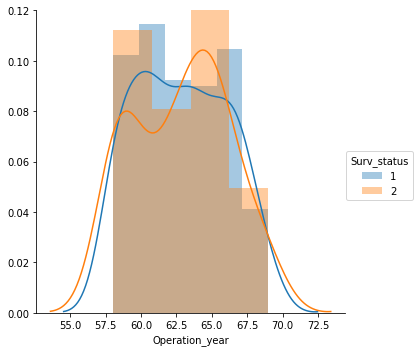

In [6]:
# Distribution of Operation Year
sns.FacetGrid(df, hue="Surv_status", size=5)\
.map(sns.distplot, "Operation_year").add_legend();
plt.show();

## Observation:

1) The data is overlapping hance, no clonclusion can be drawn from this plot.

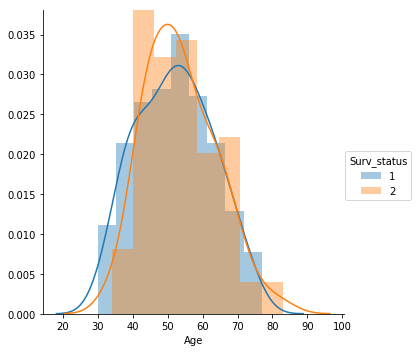

In [7]:
# Distribution for Age of Operation 
sns.FacetGrid(df, hue="Surv_status", size=5)\
.map(sns.distplot, "Age").add_legend();
plt.show();

## Objervation:
1) The data is overlappin hence no major information can be gained.  
2) The person with age between 30-35 yrs. has survived and patient with Age more then 78 yrs died within 5 yrs. of surgary.

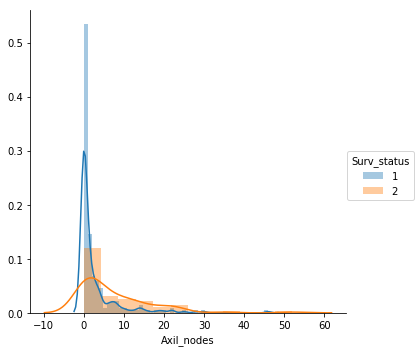

In [8]:
# Distribution for Age of Operation 
sns.FacetGrid(df, hue="Surv_status", size=5)\
.map(sns.distplot, "Axil_nodes").add_legend();
plt.show();

### Observation:
1) It has been seen that most of the patient has axil nodes between 0 to 30.  
2) patient with 0-2 auxili node had higher chances of survival.  
3) Data is overlapping hence we can't find "lines" and "if-else" conditions to build a simple model to classify the survive and died from the data of the axile node.

### PDF and CDF:

TypeError: 'str' object is not callable

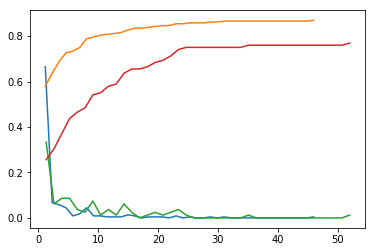

In [45]:
Survived= df.loc[df["Surv_status"]== 1]
Died = df.loc[df["Surv_status"]==2]

#survived
Counts , bin_edges = np.histogram(Survived["Axil_nodes"],bins=40,density=True)
pdf=Counts/sum(Counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(Counts)
plt.plot(bin_edges[1:],cdf)

#Death
Counts , bin_edges = np.histogram(Died["Axil_nodes"],bins=40,density=True)
pdf=Counts/sum(Counts)
plt.plot(bin_edges[1:],pdf)
cdf = np.cumsum(Counts)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("X")
plt.show()